# Decision Tree Demo with Titanic Dataset

In [1]:
import numpy as np
import pandas as pd
import graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    mean_squared_error)

In [2]:
np.random.seed(1337)

In [3]:
df = pd.read_csv('./titanic_train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


> [NOTE] Due to lots of missing values in column 'Age', we won't keep it this time ;)

## Data Preprocessing

In [5]:
# Do Label Encoding on column 'Sex'
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

In [6]:
# Do One-hot Encoding on column 'Embarked'
embarked_one_hot = pd.get_dummies(df['Embarked'], prefix='Embarked')
# and put them back
df = pd.concat([df, embarked_one_hot], axis=1)

In [7]:
# Pick Features
X = df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 
        'Embarked_C', 'Embarked_Q', 'Embarked_S']]

# Pick Target
y = df['Survived']

In [8]:
# Preview features
X.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,1,0,7.2500,0,0,1
1,1,1,1,0,71.2833,1,0,0
2,3,1,0,0,7.9250,0,0,1
3,1,1,1,0,53.1000,0,0,1
4,3,0,0,0,8.0500,0,0,1


In [9]:
# Preview targets
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1337)

## Model Building

In [11]:
clf = DecisionTreeClassifier(random_state=1337)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1337,
            splitter='best')

## Evaluating

### Predicting

In [12]:
pred = clf.predict(X_test)
pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0])

Accuracy Score

In [13]:
# Use method of the model itself
test_score = clf.score(X_test, y_test)
test_score

0.8203389830508474

In [14]:
# Use accuracy_score function
test_score = accuracy_score(y_test, pred)
test_score

0.8203389830508474

### Confusion Matrix

Reference: [Confusion Matrix | Wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix)

In [15]:
confusion_matrix = confusion_matrix(y_test, pred)
confusion_matrix

array([[161,  22],
       [ 31,  81]])

### Precision

Reference: [Precision and recall | Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall)

In [16]:
precision = precision_score(y_test, pred)
precision

0.7864077669902912

### Recall

In [17]:
recall = recall_score(y_test, pred)
recall

0.7232142857142857

### Mean Squared Error

In [18]:
mse = mean_squared_error(y_test, pred)
mse

0.17966101694915254

## Visualization

In [19]:
# Build a shallower model in order to get easily observed and visualized
clf = DecisionTreeClassifier(random_state=1337, max_depth=2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1337,
            splitter='best')

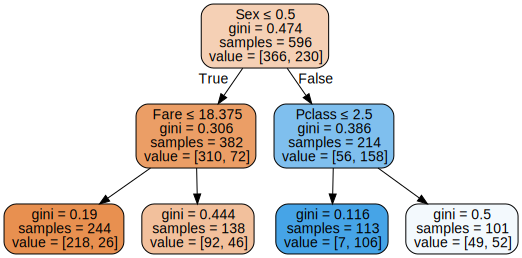

In [20]:
dot_data = tree.export_graphviz(clf, 
                                out_file=None, 
                                feature_names=X.columns.tolist(),   
                                filled=True,
                                rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph